# <center>**Trabajo Práctico Número 1**</center>

### <center>**Recorridos en Ecobicis - Año 2024**</center>

#### <center>Análisis de datos - CEIA, Fiuba</center>

---

**Integrantes del grupo**

- Espínola, Carla
- Gambarte, Antonella

---


### Bibliotecas


In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

### Carga de datos desde archivo cvs

In [2]:
df_recorridos_orig = pd.read_csv("../tp_datos/badata_ecobici_recorridos_realizados_2024.csv")
df_recorridos_orig.id_usuario = df_recorridos_orig.id_usuario.astype(int)
print(df_recorridos_orig.shape)
df_recorridos_orig.head()

(3559284, 17)


,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero
0,20428222,568,2024-01-23 18:36:00,513,308 - SAN MARTIN II,Av. San Martín 5129,-58.490739,-34.597130,2024-01-23 18:45:28,498,055 - HABANA,Gral. José Gervasio Artigas 4298 (y Habana),-58.494959,-34.586598,992557,FIT,MALE
1,20431744,1355,2024-01-23 22:41:20,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,2024-01-23 23:03:55,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,320782,FIT,FEMALE
2,20429936,0,2024-01-23 20:06:22,467,328 - SARMIENTO II,Sarmiento 2037,-58.395893,-34.605514,2024-01-23 20:06:22,6,006 - Parque Lezama,"Avenida Martin Garcia, 295",-58.369758,-34.628526,828678,FIT,FEMALE
3,20429976,0,2024-01-23 20:08:17,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,2024-01-23 20:08:17,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,320782,ICONIC,FEMALE
4,20424802,680,2024-01-23 15:18:39,137,137 - AZOPARDO Y CHILE,AZOPARDO 700,-58.367492,-34.615598,2024-01-23 15:29:59,150,150 - RODRIGO BUENO,Av. España 2200,-58.355465,-34.618755,861425,FIT,FEMALE


#### Traemos datos extra de la base de usuarios

In [3]:
df_usuarios_1 = pd.read_csv("../tp_datos/usuarios_ecobici_2024.csv")
print(df_usuarios_1.shape)
df_usuarios_1.head()

(197077, 5)


,id_usuario,genero_usuario,edad_usuario,fecha_alta,hora_alta
0,1094487,OTHER,35,2024-01-18,09:21:02
1,1097128,FEMALE,21,2024-01-21,23:02:26
2,1102901,OTHER,19,2024-01-29,19:33:32
3,1096100,FEMALE,29,2024-01-20,18:57:05
4,1103049,MALE,21,2024-01-30,00:49:33


In [4]:
hoja = 'usuarios_ecobici_2024'
df_usuarios_2 = pd.read_excel("../tp_datos/usuarios_ecobici_2024.xlsx", sheet_name=hoja)
df_usuarios_2.columns = ['id_usuario', 'genero_usuario', 'edad_usuario', 'fecha_alta', 'hora_alta', 'has_dni']
print(df_usuarios_2.shape)
df_usuarios_2.head()

(141539, 6)


,id_usuario,genero_usuario,edad_usuario,fecha_alta,hora_alta,has_dni
0,1224742,FEMALE,24.0,2024-10-08,12:34:05,No
1,1224990,MALE,18.0,2024-10-08,18:58:27,No
2,1225021,MALE,30.0,2024-10-08,19:55:22,No
3,1224773,OTHER,23.0,2024-10-08,13:25:01,No
4,1225009,MALE,21.0,2024-10-08,19:24:09,No


In [5]:
usuarios_1 = set(df_usuarios_1.id_usuario.unique())
usuarios_2 = set(df_usuarios_2.id_usuario.unique())
print("usuarios_1:",len(usuarios_1))
print("usuarios_2:",len(usuarios_2))
# Calcular la intersección entre ambos conjuntos de usuarios
interseccion_usuarios_lista = list(usuarios_1.intersection(usuarios_2))
print(len(interseccion_usuarios_lista))

# Filtrar las filas de df_usuarios que tienen id_usuario no presente en df_usuarios_2
filas_para_agregar = df_usuarios_1[~df_usuarios_1.id_usuario.isin(usuarios_2)]

# Concatenar estas filas al DataFrame df_usuarios_2
df_usuarios = pd.concat([df_usuarios_2, filas_para_agregar], ignore_index=True)

# Mostrar las primeras filas del DataFrame actualizado
df_usuarios.head()

usuarios_1: 197077
usuarios_2: 141539
141537


,id_usuario,genero_usuario,edad_usuario,fecha_alta,hora_alta,has_dni
0,1224742,FEMALE,24.0,2024-10-08 00:00:00,12:34:05,No
1,1224990,MALE,18.0,2024-10-08 00:00:00,18:58:27,No
2,1225021,MALE,30.0,2024-10-08 00:00:00,19:55:22,No
3,1224773,OTHER,23.0,2024-10-08 00:00:00,13:25:01,No
4,1225009,MALE,21.0,2024-10-08 00:00:00,19:24:09,No


In [141]:
selected_columns = ['id_usuario','edad_usuario','fecha_alta','hora_alta','has_dni']
df_recorridos = pd.merge(df_recorridos_orig, df_usuarios[selected_columns], on='id_usuario', how='left')

In [142]:
df_recorridos['fecha_alta'] = pd.to_datetime(df_recorridos['fecha_alta'], errors='coerce')
df_recorridos['hora_alta'] = df_recorridos['hora_alta'].astype(str)
df_recorridos['fecha_alta'] = df_recorridos['fecha_alta'].dt.strftime('%Y-%m-%d') + ' ' + df_recorridos['hora_alta']
df_recorridos.drop('hora_alta', axis=1, inplace=True)

In [143]:
df_recorridos.head()

,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero,edad_usuario,fecha_alta,has_dni
0,20428222,568,2024-01-23 18:36:00,513,308 - SAN MARTIN II,Av. San Martín 5129,-58.490739,-34.597130,2024-01-23 18:45:28,498,055 - HABANA,Gral. José Gervasio Artigas 4298 (y Habana),-58.494959,-34.586598,992557,FIT,MALE,NaN,NaN,NaN
1,20431744,1355,2024-01-23 22:41:20,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,2024-01-23 23:03:55,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,320782,FIT,FEMALE,NaN,NaN,NaN
2,20429936,0,2024-01-23 20:06:22,467,328 - SARMIENTO II,Sarmiento 2037,-58.395893,-34.605514,2024-01-23 20:06:22,6,006 - Parque Lezama,"Avenida Martin Garcia, 295",-58.369758,-34.628526,828678,FIT,FEMALE,NaN,NaN,NaN
3,20429976,0,2024-01-23 20:08:17,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,2024-01-23 20:08:17,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,320782,ICONIC,FEMALE,NaN,NaN,NaN
4,20424802,680,2024-01-23 15:18:39,137,137 - AZOPARDO Y CHILE,AZOPARDO 700,-58.367492,-34.615598,2024-01-23 15:29:59,150,150 - RODRIGO BUENO,Av. España 2200,-58.355465,-34.618755,861425,FIT,FEMALE,NaN,NaN,NaN


In [144]:
df_recorridos.shape

(3559284, 20)

In [146]:
'duracion_recorrido', 'fecha_origen_recorrido',
       'id_estacion_origen', 'long_estacion_origen',
       'lat_estacion_origen', 'modelo_bicicleta', 'genero', 'edad_usuario', 'fecha_alta', 'has_dni', 'id_usuario',

'fecha_destino_recorrido', 'id_estacion_destino',
       'nombre_estacion_destino', 'direccion_estacion_destino',
       'long_estacion_destino', 'lat_estacion_destino', 
       

Index(['id_recorrido', 'duracion_recorrido', 'fecha_origen_recorrido',
       'id_estacion_origen', 'nombre_estacion_origen',
       'direccion_estacion_origen', 'long_estacion_origen',
       'lat_estacion_origen', 'fecha_destino_recorrido', 'id_estacion_destino',
       'nombre_estacion_destino', 'direccion_estacion_destino',
       'long_estacion_destino', 'lat_estacion_destino', 'id_usuario',
       'modelo_bicicleta', 'genero', 'edad_usuario', 'fecha_alta', 'has_dni'],
      dtype='object')

### Shape del dataframe y nombre de columnas

In [36]:
filas,columnas = df_recorridos.shape
print(f"El DataFrame tiene {filas} observaciones y {columnas} variables.")

El DataFrame tiene 3559284 observaciones y 20 variables.


In [37]:
print("Nombre de las variables:")

for i, col in enumerate(df_recorridos.columns):
    print(f"{i+1}. {col}")

Nombre de las variables:
1. id_recorrido
2. duracion_recorrido
3. fecha_origen_recorrido
4. id_estacion_origen
5. nombre_estacion_origen
6. direccion_estacion_origen
7. long_estacion_origen
8. lat_estacion_origen
9. fecha_destino_recorrido
10. id_estacion_destino
11. nombre_estacion_destino
12. direccion_estacion_destino
13. long_estacion_destino
14. lat_estacion_destino
15. id_usuario
16. modelo_bicicleta
17. genero
18. edad_usuario
19. fecha_alta
20. has_dni


### Tipos de datos de cada variable

Para las fechas hacemos conversión a datetime, para has_dni hacemos la conversión a boolean


In [38]:
df_recorridos['fecha_destino_recorrido'] = pd.to_datetime(df_recorridos['fecha_destino_recorrido'])
df_recorridos['fecha_origen_recorrido'] = pd.to_datetime(df_recorridos['fecha_origen_recorrido'])
df_recorridos['fecha_alta'] = pd.to_datetime(df_recorridos['fecha_alta'])
df_recorridos['has_dni'] = df_recorridos['has_dni'].map({'Yes': True, 'No': False, np.nan: np.nan})

print(f"Columnas del dataframe:\n{df_recorridos.dtypes}\n")

Columnas del dataframe:
id_recorrido                           int64
duracion_recorrido                     int64
fecha_origen_recorrido        datetime64[ns]
id_estacion_origen                     int64
nombre_estacion_origen                object
direccion_estacion_origen             object
long_estacion_origen                 float64
lat_estacion_origen                  float64
fecha_destino_recorrido       datetime64[ns]
id_estacion_destino                    int64
nombre_estacion_destino               object
direccion_estacion_destino            object
long_estacion_destino                float64
lat_estacion_destino                 float64
id_usuario                             int64
modelo_bicicleta                      object
genero                                object
edad_usuario                         float64
fecha_alta                    datetime64[ns]
has_dni                               object
dtype: object



### Comprobamos si existen observaciones duplicadas


In [39]:
print("Cantidad de datos duplicados:", df_recorridos.duplicated().sum())

Cantidad de datos duplicados: 1


In [40]:
duplicados = df_recorridos[df_recorridos.duplicated(keep=False)]
print("Datos de duplicado:\n")
duplicados.head()


Datos de duplicado:



,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero,edad_usuario,fecha_alta,has_dni
434350,22425357,1119,2024-07-23 12:30:30,104,104 - Federico Lacroze,Av. Guzman 1100 & Av. Corrientes,-58.455212,-34.587617,2024-07-23 12:49:09,402,-- CDO Chacarita -- (Temporal),3209 Av. Francisco Beiro,-58.498542,-34.597612,1039158,FIT,MALE,NaN,NaT,NaN
434351,22425357,1119,2024-07-23 12:30:30,104,104 - Federico Lacroze,Av. Guzman 1100 & Av. Corrientes,-58.455212,-34.587617,2024-07-23 12:49:09,402,-- CDO Chacarita -- (Temporal),3209 Av. Francisco Beiro,-58.498542,-34.597612,1039158,FIT,MALE,NaN,NaT,NaN


#### Existe solo un duplicado. Procedemos a eliminarlo.


In [140]:
df_recorridos = df_recorridos.drop_duplicates()
print("Duplicados después:", df_recorridos.duplicated().sum())
df_recorridos.shape

Duplicados después: 0


(3559283, 22)

### Graficamos proporción de valores nulos en cada columna


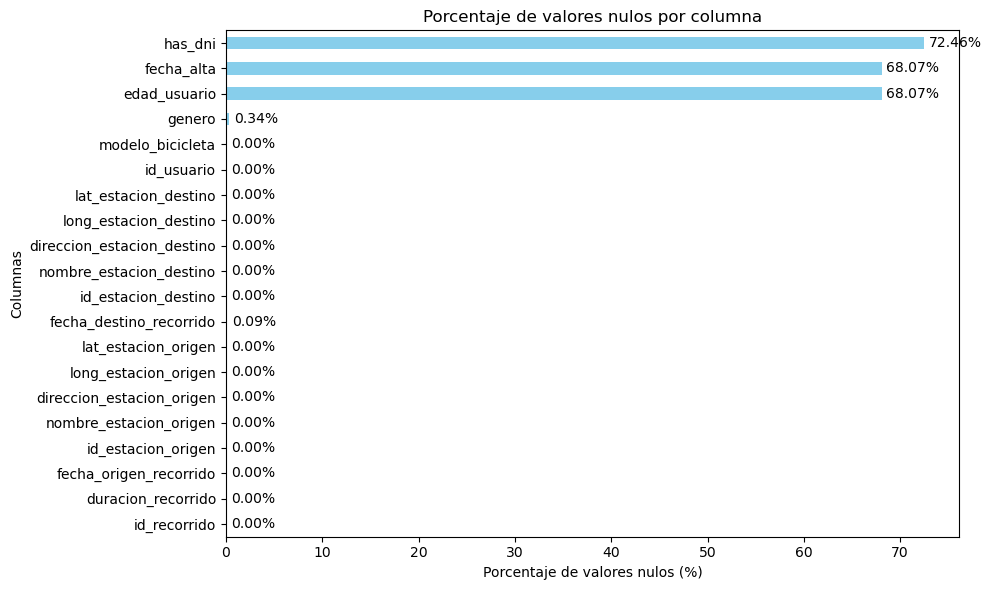

In [16]:
porcentaje_nulos = df_recorridos.isna().mean().round(4) * 100

plt.figure(figsize=(10, 6))
porcentaje_nulos.plot(kind='barh', color='skyblue')

plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje de valores nulos (%)')
plt.ylabel('Columnas')

for index, value in enumerate(porcentaje_nulos):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.tight_layout()
plt.show()

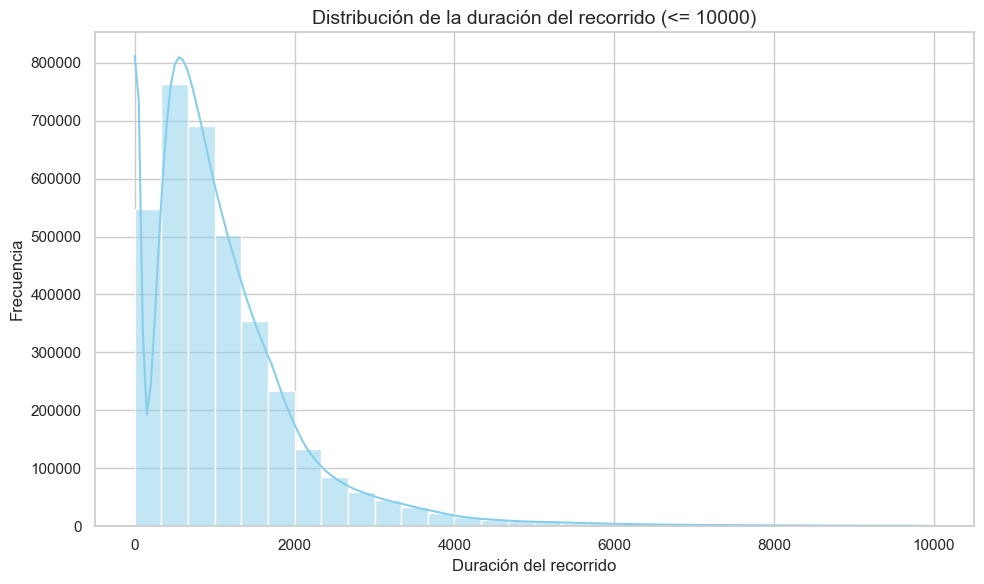

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos para duraciones <= 1000
df_filtrado = df_recorridos[df_recorridos["duracion_recorrido"] <= 10000]

# Gráfico
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtrado, x="duracion_recorrido", kde=True, bins=30, color="skyblue")

# Títulos y etiquetas
plt.title("Distribución de la duración del recorrido (<= 10000)", fontsize=14)
plt.xlabel("Duración del recorrido", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

plt.tight_layout()
plt.show()


In [92]:
# Cantidad de ceros en duracion_recorrido
df_recorridos[df_recorridos.duracion_recorrido==0].shape

(37618, 20)

Los porcentajes de faltantes son muy altos para las features agregadas a partir del dataset de usuarios y muy bajos para fecha_destino_recorrido como para género. 
Hay nulos en duracion_recorrido que son reflejados como un 0 dado que no existe fecha_destino_recorrido como para calcular el tiempo y otros que se pueden calcular a partir del dato fecha_destino_recorrido existente.

### Matriz de valores faltantes

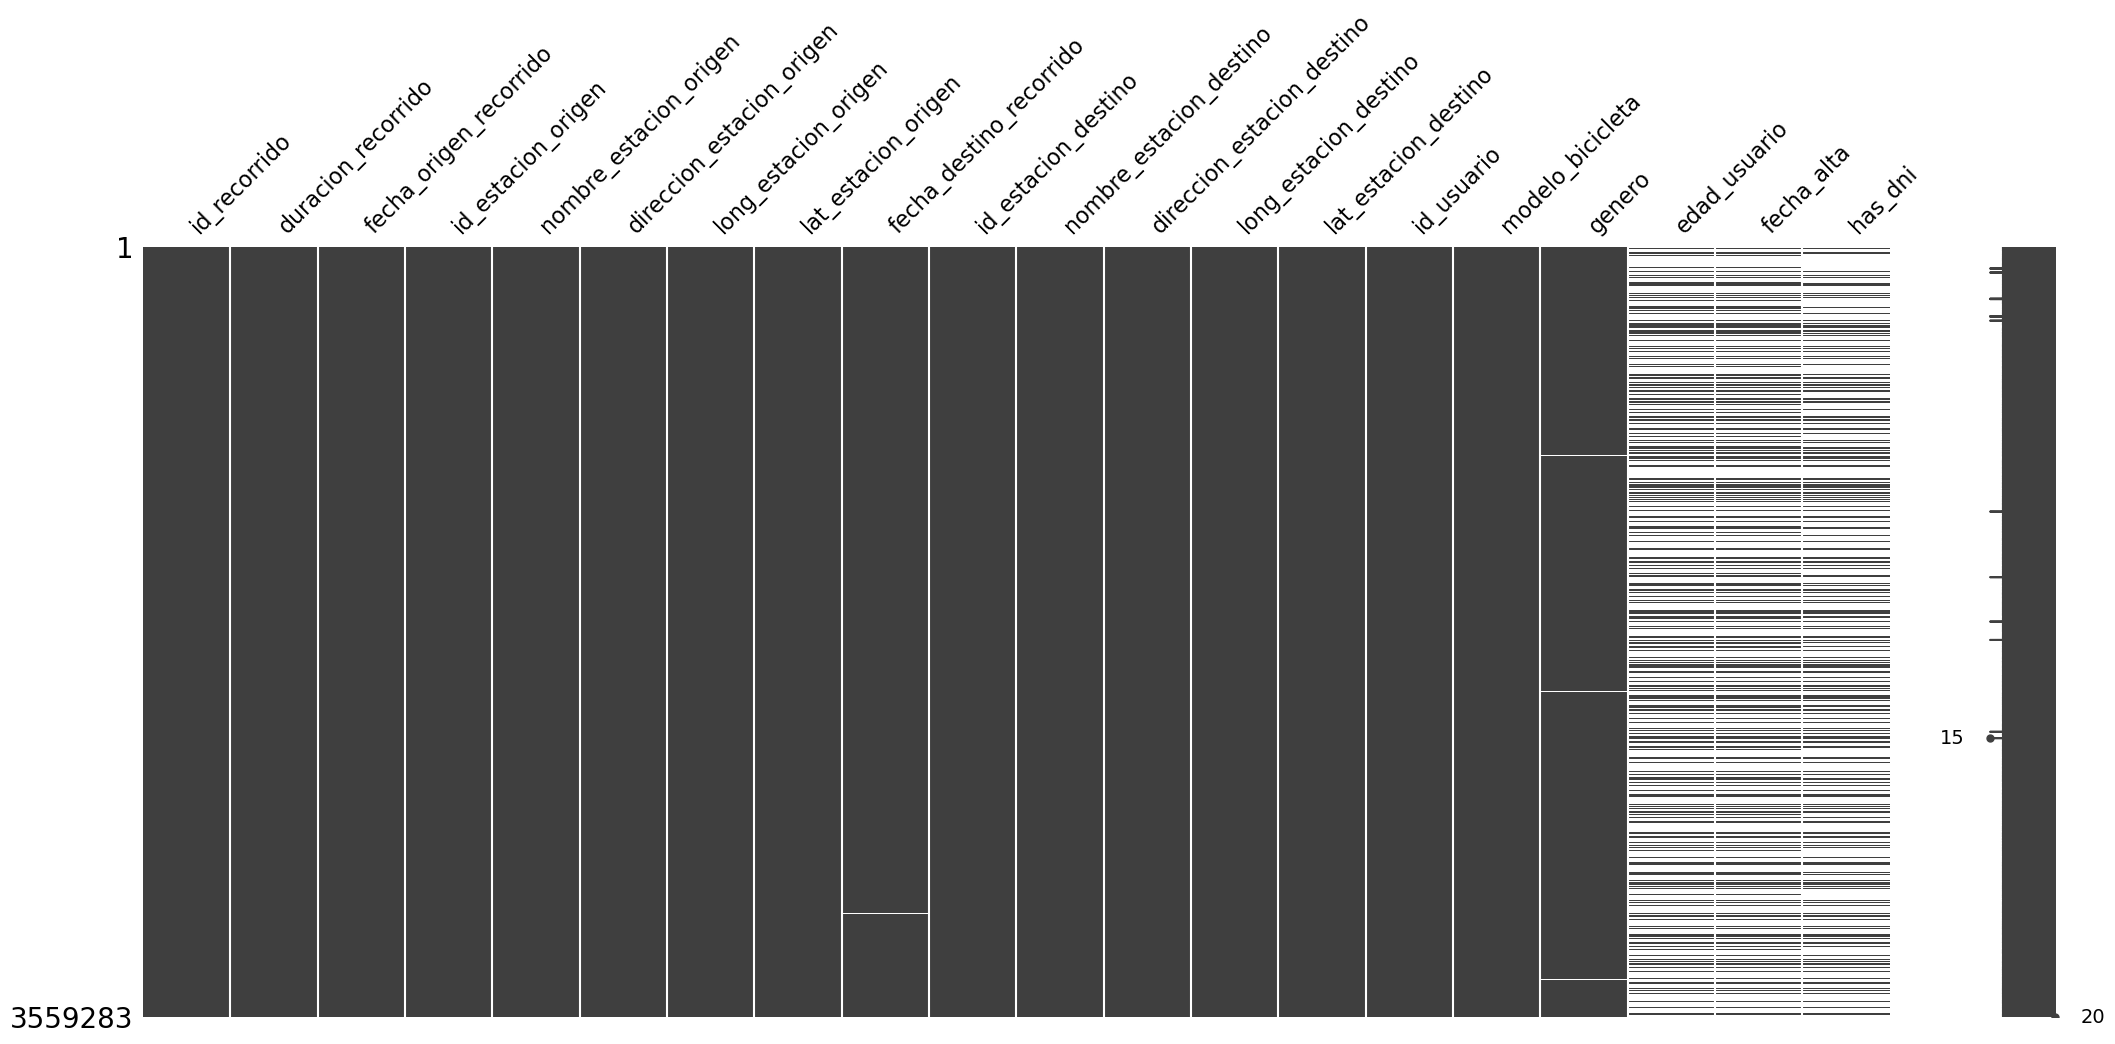

In [17]:
msno.matrix(df_recorridos)
plt.show()


Analizamos si existe correlacción entre los valores nulos de las columnas


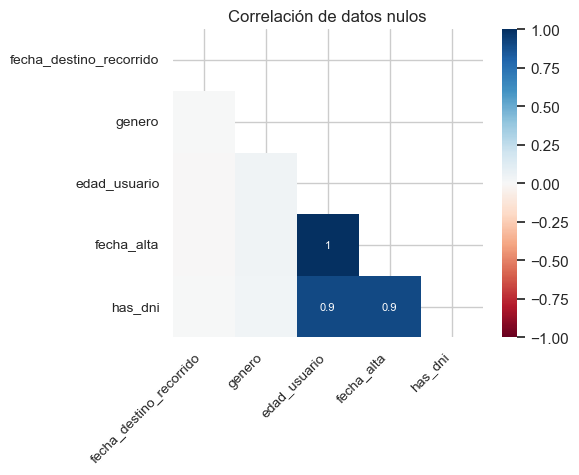

In [96]:
msno.heatmap(df_recorridos, fontsize=10, figsize=(5,4))
plt.title("Correlación de datos nulos", fontsize=12)
plt.show()

Observamos que no exite correlación entre los datos faltantes de las columnas género y fecha destino.
La correlación entre edad_usuario, fecha_alta y has_dni se debe a que estas features salen de la base de usuarios.


## Análisis de las causas de los datos faltantes


### Faltantes de género

De las observaciones que conforman el dataset, armamos dos grupos. Uno con aquellos que contienen la variable genero completa y otro con aquellos que tienen ese campo vacío.


In [19]:
con_genero = df_recorridos[df_recorridos['genero'].notnull()]
sin_genero = df_recorridos[df_recorridos['genero'].isnull()]

Primero analizamos los faltantes con respecto al modelo de bicicleta.


In [20]:
print("Distribución modelo_bicicleta (con género):")
print(con_genero['modelo_bicicleta'].value_counts(normalize=True))

print("\nDistribución modelo_bicicleta (sin género):")
print(sin_genero['modelo_bicicleta'].value_counts(normalize=True))

Distribución modelo_bicicleta (con género):
modelo_bicicleta
FIT       0.725544
ICONIC    0.274456
Name: proportion, dtype: float64

Distribución modelo_bicicleta (sin género):
modelo_bicicleta
FIT       0.727775
ICONIC    0.272225
Name: proportion, dtype: float64


Observamos que la distribución de modelo_bicicleta es prácticamente igual con y sin género. Entonces, el tipo de bicicleta no influye en los faltantes de género.

Ahora comparamos con respecto a la duración del recorrido. Calculamos el valores promedio de duración de recorridos tanto para las observaciones con género informado y sin género informado.


In [21]:
duracion_promedio = df_recorridos.groupby(df_recorridos['genero'].isnull())['duracion_recorrido'].mean()/ 60
duracion_promedio.index = ['Con genero', 'Sin genero']
duracion_promedio.head()

Con genero    21.259858
Sin genero    17.462573
Name: duracion_recorrido, dtype: float64

Vemos que los que para los que no tienen género informado, la duración promedio es aproximádamente 4 minutos menor. Esto sugiere que la menor duración podría estar relacionada con la ausencia del dato de género.

Para confirmar si la falta de información de género depende efectivamente de otras variables, realizamos comparaciones utilizando la fecha de origen. En particular, analizamos la distribución de viajes según el mes y el día de la semana.


In [135]:
df_recorridos[df_recorridos.genero.isna()].groupby('mes_origen').count()['id_recorrido']/gb_mes

mes_origen
1     0.003408
2     0.003044
3     0.003419
4     0.003363
5     0.004032
6     0.003795
7     0.003718
8     0.003786
9     0.003135
10    0.003029
11    0.002993
12    0.003052
Name: id_recorrido, dtype: float64

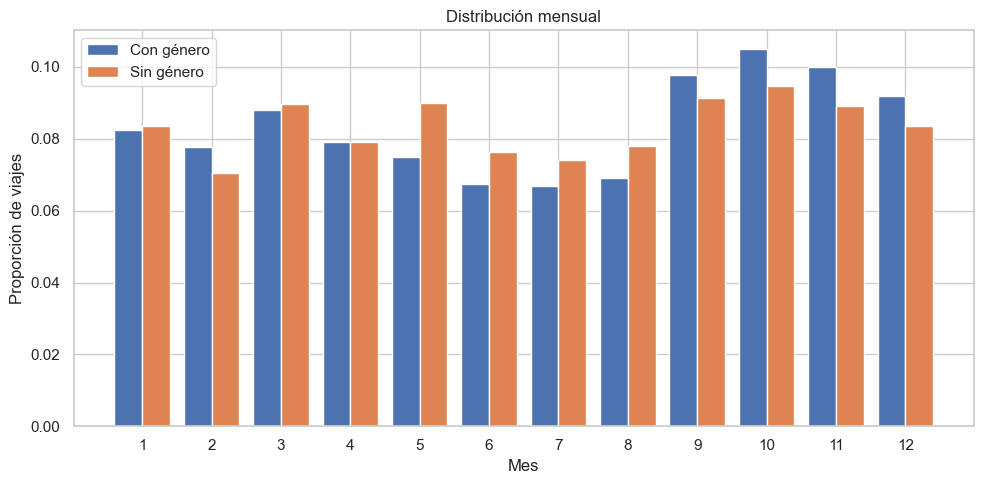

In [136]:
# Extraemos mes y día de la semana de la columna fecha_origen_recorrido
df_recorridos['mes_origen'] = df_recorridos['fecha_origen_recorrido'].dt.month
df_recorridos['dia_semana_origen'] = df_recorridos['fecha_origen_recorrido'].dt.day_name()

# Separamos por grupos
con_genero = df_recorridos[df_recorridos['genero'].notnull()]
sin_genero = df_recorridos[df_recorridos['genero'].isnull()]

# Calculo de proporciones por mes
dist_mes_con = con_genero['mes_origen'].value_counts(normalize=True).sort_index()
dist_mes_sin = sin_genero['mes_origen'].value_counts(normalize=True).sort_index()

#gb_mes = df_recorridos.groupby('mes_origen').count()['id_recorrido']
#dist_mes_con = con_genero.groupby('mes_origen').count()['id_recorrido']/gb_mes
#dist_mes_sin = sin_genero.groupby('mes_origen').count()['id_recorrido']/gb_mes

# Gráfico
plt.figure(figsize=(10, 5))
plt.bar(dist_mes_con.index - 0.2, dist_mes_con.values, width=0.4, label='Con género')
plt.bar(dist_mes_sin.index + 0.2, dist_mes_sin.values, width=0.4, label='Sin género')
plt.xticks(range(1, 13))
plt.xlabel("Mes")
plt.ylabel("Proporción de viajes")
plt.title("Distribución mensual")
plt.legend()
plt.tight_layout()
plt.show()


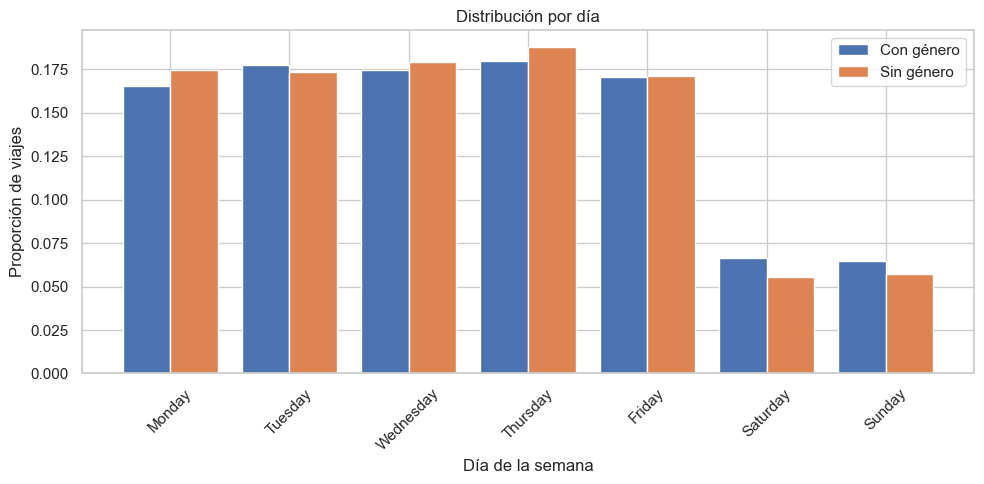

In [100]:
# Definición de días
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Proporciones por día
dist_dia_con = con_genero['dia_semana_origen'].value_counts(normalize=True).reindex(dias_orden)
dist_dia_sin = sin_genero['dia_semana_origen'].value_counts(normalize=True).reindex(dias_orden)

# Gráfico
plt.figure(figsize=(10, 5))
x = range(len(dias_orden))
plt.bar([i - 0.2 for i in x], dist_dia_con.values, width=0.4, label='Con género')
plt.bar([i + 0.2 for i in x], dist_dia_sin.values, width=0.4, label='Sin género')
plt.xticks(x, dias_orden, rotation=45)
plt.xlabel("Día de la semana")
plt.ylabel("Proporción de viajes")
plt.title("Distribución por día")
plt.legend()
plt.tight_layout()
plt.show()


Si hacemos la comparación por días de la semana, el día sabádo y domingo existe una ligera diferencia entre las distribuciones para el grupo de tienen género con respecto a los que no. En donde si existe mayor diferencia es en la comparativa mes a mes. Esto sugiere que los datos faltantes de género si depende de otra variable, en este caso, la fecha de origen, por lo que es de tipo MAR.


### Faltantes de fecha_destino_recorrido

Comparamos primero con la duración del recorrido.


In [101]:
# Creamos dos grupos, uno con fecha destino y otra sin fecha destino
con_fecha_destino = df_recorridos[df_recorridos['fecha_destino_recorrido'].notnull()]
sin_fecha_destino = df_recorridos[df_recorridos['fecha_destino_recorrido'].isnull()]

# Duración promedio
print("Duración promedio con fecha destino:", con_fecha_destino['duracion_recorrido'].mean())
print("Duración promedio sin fecha destino:", sin_fecha_destino['duracion_recorrido'].mean())


Duración promedio con fecha destino: 1276.0382164422886
Duración promedio sin fecha destino: 0.0


La duración promedio para los sin fecha es cero. Analizamos que anomalía existe en ese caso.


In [102]:
condicion = (df_recorridos['duracion_recorrido'] == 0) & (df_recorridos['fecha_destino_recorrido'].isnull())
cantidad_ceros = df_recorridos[condicion].shape[0]
print(f"Cantidad de observaciones con duración 0 y sin fecha destino: {cantidad_ceros}")


Cantidad de observaciones con duración 0 y sin fecha destino: 3379


Todos los faltantes en fecha destino están relacionados con los que tienen duración cero. Podemos concluir que existe la relación directa entre ambas, por lo que el faltante en fecha_destino_recorrido es del tipo MAR.


In [103]:
df_recorridos[condicion].head(10)


,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,...,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero,edad_usuario,fecha_alta,has_dni,mes_origen,dia_semana_origen
63800,24502775,0,2024-12-31 20:34:50,324,280 - JURAMENTO,5209 Juramento,-58.484056,-34.578933,NaT,553,...,-58.500942,-34.580192,594121,FIT,FEMALE,NaN,NaT,NaN,12,Tuesday
63801,24502746,0,2024-12-31 20:25:28,369,304 - Navarro,Navarro 2625,-58.491797,-34.592244,NaT,553,...,-58.500942,-34.580192,1110710,ICONIC,MALE,24.0,2024-02-13 18:23:21,True,12,Tuesday
64730,24493951,0,2024-12-30 21:08:03,418,345 - Plaza Mafalda,Conde & Concepción Arenal,-58.444580,-34.580938,NaT,418,...,-58.444580,-34.580938,1158360,ICONIC,FEMALE,28.0,2024-05-20 17:11:06,True,12,Monday
64741,24493039,0,2024-12-30 19:55:50,385,268 - Plaza Aristóbulo Del Valle,Campana & Marcos Sastre,-58.493141,-34.606160,NaT,498,...,-58.494959,-34.586598,443254,ICONIC,MALE,NaN,NaT,NaN,12,Monday
64748,24493560,0,2024-12-30 20:33:54,14,014 - Pacifico,"Santa Fe Av. & Bullrich, Int. Av.",-58.426387,-34.577424,NaT,387,...,-58.465568,-34.602028,1174804,FIT,FEMALE,21.0,2024-07-08 15:40:16,True,12,Monday
64777,24493742,0,2024-12-30 20:49:11,135,135 - MARCELO T. DE ALVEAR,Esmeralda & Paraguay,-58.378363,-34.597642,NaT,60,...,-58.371079,-34.601651,1179399,FIT,MALE,29.0,2024-07-18 13:52:05,True,12,Monday
64798,24494592,0,2024-12-30 22:35:52,261,272 - Plaza Bruno Giordano,Bruno Giordano&Neuquen,-58.440584,-34.616151,NaT,182,...,-58.435247,-34.578048,1126152,FIT,FEMALE,36.0,2024-03-10 14:29:50,True,12,Monday
64799,24494340,0,2024-12-30 21:54:20,568,342 - HONDURAS,Honduras 5190,-58.431960,-34.587550,NaT,182,...,-58.435247,-34.578048,911217,FIT,FEMALE,NaN,NaT,NaN,12,Monday
64800,24494597,0,2024-12-30 22:36:35,261,272 - Plaza Bruno Giordano,Bruno Giordano&Neuquen,-58.440584,-34.616151,NaT,182,...,-58.435247,-34.578048,1126150,ICONIC,MALE,31.0,2024-03-10 14:26:14,True,12,Monday
64806,24493656,0,2024-12-30 20:42:15,478,015 - AMENABAR,Teodoro García 2613,-58.447524,-34.572056,NaT,361,...,-58.453608,-34.569187,327145,FIT,FEMALE,NaN,NaT,NaN,12,Monday


Si analizamos las primeras 10 observaciones con duracion 0 y dato faltante en fecha destino, vemos que esos viajes se dieron entre el 30 y 31 de diciembre. Vamos a


In [104]:
df_recorridos[condicion]['fecha_origen_recorrido'].dt.date.value_counts().sort_index()


fecha_origen_recorrido
2024-11-07     77
2024-11-20     32
2024-11-21     84
2024-11-22     64
2024-11-23    104
2024-11-24     69
2024-11-25    175
2024-11-26    118
2024-11-27    147
2024-11-28    116
2024-11-29    127
2024-11-30     32
2024-12-01     21
2024-12-02     91
2024-12-03     65
2024-12-04     62
2024-12-05     84
2024-12-06    108
2024-12-07     55
2024-12-08     48
2024-12-09     56
2024-12-10    103
2024-12-11     99
2024-12-12    132
2024-12-13    103
2024-12-14     52
2024-12-15     47
2024-12-16     88
2024-12-17    131
2024-12-18     84
2024-12-19     67
2024-12-20     84
2024-12-21     85
2024-12-22     35
2024-12-23     49
2024-12-24      9
2024-12-25     61
2024-12-26     83
2024-12-27     97
2024-12-28     28
2024-12-29     67
2024-12-30    131
2024-12-31      9
Name: count, dtype: int64

Los faltantes no se concentran sólo esos días. Quizás se deba a algún error en el sistema.

### Faltantes de edad_usuario

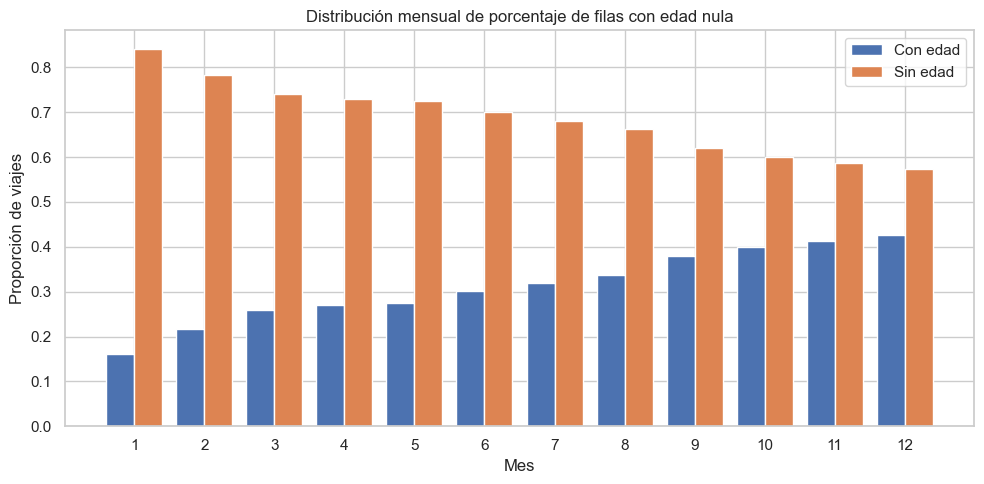

In [126]:
# Separamos por grupos
con_genero = df_recorridos[df_recorridos['edad_usuario'].notnull()]
sin_genero = df_recorridos[df_recorridos['edad_usuario'].isnull()]

# Calculo de proporciones por mes
gb_mes = df_recorridos.groupby('mes_origen').count()['id_recorrido']
dist_mes_con = con_genero.groupby('mes_origen').count()['id_recorrido']/gb_mes
dist_mes_sin = sin_genero.groupby('mes_origen').count()['id_recorrido']/gb_mes

# Gráfico
plt.figure(figsize=(10, 5))
plt.bar(dist_mes_con.index - 0.2, dist_mes_con.values, width=0.4, label='Con edad')
plt.bar(dist_mes_sin.index + 0.2, dist_mes_sin.values, width=0.4, label='Sin edad')
plt.xticks(range(1, 13))
plt.xlabel("Mes")
plt.ylabel("Proporción de viajes")
plt.title("Distribución mensual de porcentaje de filas con edad nula")
plt.legend()
plt.tight_layout()
plt.show()

Parece ser que la base de usuarios fue creciendo a lo largo del año.

### Faltantes de has_dni

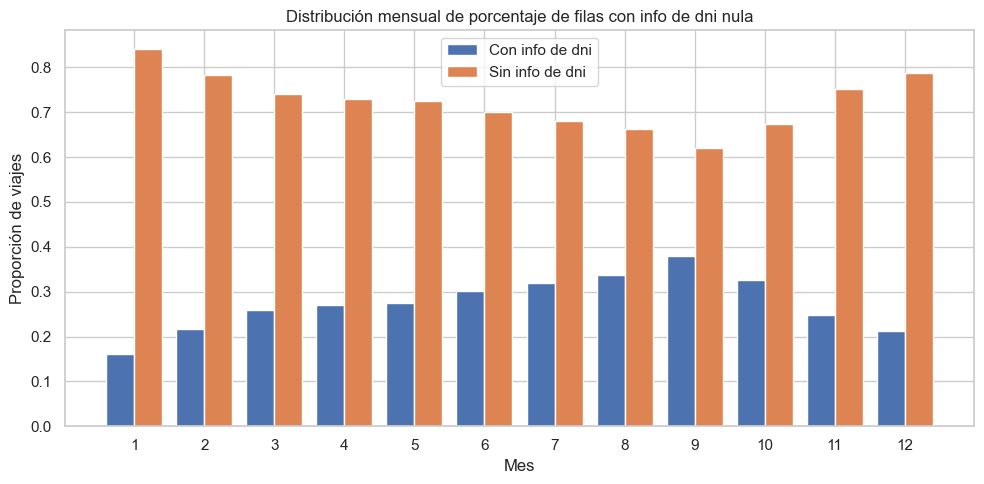

In [125]:
# Separamos por grupos
con_genero = df_recorridos[df_recorridos['has_dni'].notnull()]
sin_genero = df_recorridos[df_recorridos['has_dni'].isnull()]

# Calculo de proporciones por mes
dist_mes_con = con_genero.groupby('mes_origen').count()['id_recorrido']/gb_mes
dist_mes_sin = sin_genero.groupby('mes_origen').count()['id_recorrido']/gb_mes

# Gráfico
plt.figure(figsize=(10, 5))
plt.bar(dist_mes_con.index - 0.2, dist_mes_con.values, width=0.4, label='Con info de dni')
plt.bar(dist_mes_sin.index + 0.2, dist_mes_sin.values, width=0.4, label='Sin info de dni')
plt.xticks(range(1, 13))
plt.xlabel("Mes")
plt.ylabel("Proporción de viajes")
plt.title("Distribución mensual de porcentaje de filas con info de dni nula")
plt.legend()
plt.tight_layout()
plt.show()

El campo de agregar DNI parece ser opcional dado que no parece ser solo un tema de la base de usuarios porque al final no crece.